In [66]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import itertools as it

experiment = "Wystrach2020"
condition = "no-trap"
rewards = [1, 10, 50, 100]
winds = [0.0, 0.25, 0.5]
trapcosts = [-1, -10, -50, -100]

aps = []
groundrs = []
for reward, trapc, wind in it.product(rewards, trapcosts, winds):
    dir_ = f"../../irl/{experiment}/{condition}/{reward}/{trapc}/{wind}"

    try:
        action_probs = np.load(f"{dir_}/results/action_probs.npy",)
        aps.append(action_probs)
        ground_r = np.load(f"{dir_}/results/ground_r.npy")
        ground_r = np.where(ground_r == reward, 1, ground_r)
        ground_r = np.where(ground_r == trapc, -1, ground_r)

        groundrs.append(ground_r)
    except:
        print(f"{dir_} not yet there")


In [62]:
from collections import Counter
print(Counter(list(groundrs[0])))
print(len(groundrs))

print(Counter([np.array_equal(groundrs[0], arr) for arr in groundrs]))
all([np.array_equal(groundrs[0], arr) for arr in groundrs])

Counter({0: 1309, 1: 50, -1: 21})
39
Counter({True: 39})


True

In [63]:
print(Counter([np.array_equal(aps[0], arr) for arr in aps]))
all([np.array_equal(aps[0], arr) for arr in aps])

Counter({True: 39})


True

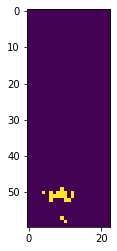

In [67]:
import matplotlib.pyplot as plt
width= 23 # Melaphorus bagoti: minX -.565 maxX 1.62
height= 60 # M. bagoti: minY -.179 maxY 5.768

groundr = np.reshape(groundrs[0], (height, width))
plt.imshow(groundr)

In [87]:
import pandas as pd
df = pd.read_csv(f"../../irl/{experiment}/{condition}/data.csv")

df["reward"] = 0
by_ant_trial = df.groupby(["ant_nb", "trial_nb"], sort=False)
trajectories = []
for _, frame in by_ant_trial:
    trajectories.append(frame[["state_int", "action_int", "reward", "next_state_int"]].to_numpy())

nS = aps[0].shape[0]
nA = aps[0].shape[1]
action_probabilities = np.zeros((nS, nA))
for traj in trajectories:
    for (s, a, _, _) in traj:
        action_probabilities[s][a] += 1
print(action_probabilities[:5])
action_probabilities[action_probabilities.sum(axis=1) == 0] = 1e-5
print(sum(action_probabilities[:5][0]))

action_probabilities /= action_probabilities.sum(axis=1).reshape(nS, 1)
print(action_probabilities[:5])


[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
9.000000000000001e-09
[[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]]


In [75]:
(action_probabilities == aps[0]).all()

True